# Lending Club Case Study   by Anandhakumar Dharmalingam

### Problem Statement:

Using the concepts of EDA to decipher which types of customers default on a loan

•	Need to understand how consumer attributes and loan attributes influence the tendency of default.



#### Meta Data Description:

This loan.csv data set is all about the loan approval process and the borrowers repayment follow up is observed.


#### Finding the consumer attributes & loan attributes in the LOAN data set:
consumer attributes :

id, member id, grade, sub_grade, emp_title, emp_length, home_ownership,  annul_inc, desc, purpose, title, zip_code, addr_state, 
loan attributes 
loan_amnt, funded_amnt, funded_amnt_inv, term, int_rate, verification_status, Issue_d, loan_status, pym, dti, delinq_2ys, earliest_cr_line, inq_last_6mths, mths_since_last_delinq, mths_since_last_record, open_acc, pub_rec, revol_bal, revol_util, total_acc, out_prncp, out_prncp_inv, total_pymnt, total_pymnt_inv, total_rec_prncp, total_rec_int, total_rec_late_fee, recoveries, collection_recovery_fee, last_pymnt_d, last_pymnt_amnt, next_pymnt_d, last_credit_pull_d
Classifying the required variable of Loan Dataset for our analysis:
1.	Categorical Variable:

i)	Ordered

Term, int_rate, grade, sub_grade, emp_length, verification_status, issue_d, loan_status, delinq_2yrs, earliest_cr_line, inq_last_6mths, mths_since_last_delinq, mths_since_last_record, revol_util, pub_rec, last_pymnt_d, next_pymnt_d, last_credit_pull_d

ii)	Unordered

Emp_title, home_ownership, desc, purpose, title, zip_code, addr_state,


2.	Quantitative/Numeric variable: 

loan_amnt, funded_amnt, funded_amnt_inv, instalment, annual_inc, dti, open_acc, revol_bal, total_acc, out_prncp, out_prncp_inv, total_pymnt, total_pymnt_inv, total_rec_prncp, total_rec_int, total_rec_late_fee, recoveries, collection_recovery_fee, last_pymnt_amnt

## Data Cleaning

### Removing the Columns which are all having full of Missing Values

In [ ]:
import pandas as pd
lds=pd.read_csv(r'F:\UPGRAD\loan\loan\loan.csv',low_memory=False)
lds=lds.dropna(axis=1,how="all")
print("Columns after removing the missing values")
print(lds.info())

#### The columns which are not usefull for finding the defaulter are removed:

In [ ]:
NotUsefulColumn = ["id", "member_id", "funded_amnt", "emp_title", "pymnt_plan", "url", "desc", "title", "zip_code", "delinq_2yrs", "mths_since_last_delinq", "mths_since_last_record", "revol_bal", "initial_list_status", "out_prncp", "out_prncp_inv", "total_pymnt", "total_pymnt_inv", "total_rec_prncp", "total_rec_int", "total_rec_late_fee", "recoveries", "collection_recovery_fee", "last_pymnt_d", "last_pymnt_amnt", "next_pymnt_d", "last_credit_pull_d", "collections_12_mths_ex_med", "policy_code", "acc_now_delinq", "chargeoff_within_12_mths", "delinq_amnt", "tax_liens", "application_type", "pub_rec_bankruptcies", "addr_state"]
lds.drop(NotUsefulColumn, axis=1, inplace=True)
print("final remaining columns are",list(lds.columns))

#### emp_length and revol_util having null and NA rows are removed

In [ ]:
lds.dropna(axis=0, subset=["emp_length","revol_util"], inplace=True)

## Standardise values

#### Standardise values by removing the percentage and text feature to numeric type for int_rate, revol_util and term columns

In [ ]:
lds["int_rate"]=pd.to_numeric(lds["int_rate"].apply(lambda p:p.split('%') [0]))
lds["revol_util"]=pd.to_numeric(lds["revol_util"].apply(lambda p:p.split('%') [0]))

In [ ]:
lds["term"]=pd.to_numeric(lds["term"].apply(lambda p:p.split()[0]))

##### Removing the value current because of irrelavent to the problem statement and changing the value fully paid to 0 and charged off to 1 of loan_status column

In [ ]:
lds=lds[lds["loan_status"].apply(lambda p:False if p=="Current" else True)]
lds["loan_status"]=lds["loan_status"].apply(lambda p:0 if p=="Fully Paid" else 1)

#####  Standerdising emp_length by changing <1 year as 0 and 10+ as 10

In [ ]:
lds["emp_length"]=pd.to_numeric(lds["emp_length"].apply(lambda p:0 if "<" in p else(p.split('+')[0] if "+" in p else p.split()[0])))

##### remove the row which is have in < 1% counts in purpose

In [ ]:
lds_purpose=lds["purpose"].value_counts()*100/lds.shape[0]

In [ ]:
lds_purpose_del=lds_purpose[lds_purpose<1].index.values
lds=lds[[False if n in lds_purpose_del else True for n in lds["purpose"]]]

## Removing Outlier which deviate the accuracy by comparing the 75% quantile and Max values 

In [ ]:
lds["annual_inc"].describe()

In [ ]:
annual_inc_99 = lds["annual_inc"].quantile(0.99)
lds = lds[lds["annual_inc"] < annual_inc_99]

In [ ]:
lds["open_acc"].describe()

In [ ]:
open_acc_999 = lds["open_acc"].quantile(0.999)
lds = lds[lds["open_acc"] < open_acc_999]

In [ ]:
lds["total_acc"].describe()

In [ ]:
total_acc_98 = lds["total_acc"].quantile(0.98)
lds = lds[lds["total_acc"] < total_acc_98]

In [ ]:
lds["pub_rec"].describe()

In [ ]:
pub_rec_995 = lds["pub_rec"].quantile(0.995)
lds = lds[lds["pub_rec"] <= pub_rec_995]

## Now the final data for the analysis after Data Cleaning and standardizing the columns:

In [ ]:
lds

## Derived Metrics

we derive separate columns like month and year from the issue_d column

In [ ]:
lds['month'] = pd.to_datetime(lds['issue_d']).dt.month
lds['year'] = pd.to_datetime(lds['issue_d']).dt.year
lds['year'] = lds['year'].apply(lambda x: abs(x) % 100)
lds['year'] = lds['year'].map(str)
lds['month'] = lds['month'].map(str)
lds['year'] = lds['year'].apply(lambda x: "0"+x if len(x)==1 else x )
lds['month'] = lds['month'].apply(lambda x: "0"+x if len(x)==1 else x )   

In [ ]:
lds

In [ ]:
lds["earliest_cr_line"] = pd.to_numeric(lds["earliest_cr_line"].apply(lambda x:x.split('-')[1]))

In [ ]:
# create bins for loan_amnt range
bins = [0, 5000, 10000, 15000, 20000, 25000, 36000]
bucket_l = ['0-5000', '5000-10000', '10000-15000', '15000-20000', '20000-25000','25000+']
lds['loan_amnt_range'] = pd.cut(lds['loan_amnt'], bins, labels=bucket_l)
# create bins for int_rate range
bins = [0, 7.5, 10, 12.5, 15, 100]
bucket_l = ['0-7.5', '7.5-10', '10-12.5', '12.5-15', '15+']
lds['int_rate_range'] = pd.cut(lds['int_rate'], bins, labels=bucket_l)
# create bins for annual_inc range
bins = [0, 25000, 50000, 75000, 100000, 1000000]
bucket_l = ['0-25000', '25000-50000', '50000-75000', '75000-100000', '100000+']
lds['annual_inc_range'] = pd.cut(lds['annual_inc'], bins, labels=bucket_l)
# create bins for installment range
def installment(n):
    if n <= 200:
        return 'low'
    elif n > 200 and n <=500:
        return 'medium'
    elif n > 500 and n <=800:
        return 'high'
    else:
        return 'very high'

lds['installment'] = lds['installment'].apply(lambda x: installment(x))
# create bins for dti range
bins = [-1, 5.00, 10.00, 15.00, 20.00, 25.00, 50.00]
bucket_l = ['0-5%', '5-10%', '10-15%', '15-20%', '20-25%', '25%+']
lds['dti_range'] = pd.cut(lds['dti'], bins, labels=bucket_l)

Derived columns are "loan_amnt_range","annual_inc_range","int_rate_range","dti_range"

In [ ]:
lds

## Data Analysis Visualisation

In [ ]:
!pip install --upgrade pip
!pip install seaborn

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="whitegrid")
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 8)
plt.figure(figsize=(14,5))
sns.countplot(y="loan_status", data=lds)
plt.show()

### Univariate Analysis



In [ ]:
# function for plotting the count plot features wrt default ratio
def plotUnivariateRatioBar(feature, data=lds, figsize=(10,5), rsorted=True):
    plt.figure(figsize=figsize)
    if rsorted:
        feature_dimension = sorted(data[feature].unique())
    else:
        feature_dimension = data[feature].unique()
    feature_values = []
    for fd in feature_dimension:
        feature_filter = data[data[feature]==fd]
        feature_count = len(feature_filter[feature_filter["loan_status"]==1])
        feature_values.append(feature_count*100/feature_filter["loan_status"].count())
    plt.bar(feature_dimension, feature_values, color='orange', edgecolor='white')
    plt.title("Loan Defaults wrt "+str(feature)+" feature - countplot")
    plt.xlabel(feature, fontsize=16)
    plt.ylabel("defaulter %", fontsize=16)
    plt.show()
# function to plot univariate with default status scale 0 - 1
def plotUnivariateBar(x, figsize=(10,5)):
    plt.figure(figsize=figsize)
    sns.barplot(x=x, y='loan_status', data=lds)
    plt.title("Loan Defaults wrt "+str(x)+" feature - countplot")
    plt.xlabel(x, fontsize=16)
    plt.ylabel("defaulter ratio", fontsize=16)
    plt.show()

In [ ]:
# check for defaulters wrt term in the data using countplot
plotUnivariateBar("term", figsize=(8,5))

In [ ]:
# check for defaulters wrt grade in the data using countplot
plotUnivariateRatioBar("grade")

In [ ]:
# check for defaulters wrt sub_grade in the data using countplot
plotUnivariateBar("sub_grade", figsize=(16,5))

In [ ]:
# check for defaulters wrt home_ownership in the data 
plotUnivariateRatioBar("home_ownership")

In [ ]:
# check for defaulters wrt verification_status in the data
plotUnivariateRatioBar("verification_status")

In [ ]:
# check for defaulters wrt purpose in the data using countplot
plotUnivariateBar("purpose", figsize=(16,6))

In [ ]:
# check for defaulters wrt open_acc in the data using countplot
plotUnivariateRatioBar("open_acc", figsize=(16,6))

In [ ]:
# check for defaulters wrt pub_rec in the data using countplot
plotUnivariateRatioBar("pub_rec")

#### Working on Continuous column variables

In [ ]:
# check for defaulters wrt emp_length in the data using countplot
plotUnivariateBar("emp_length", figsize=(14,6))

In [ ]:
# check for defaulters wrt month in the data using countplot
plotUnivariateBar("month", figsize=(14,6))

In [ ]:
# check for defaulters wrt year in the data using countplot
plotUnivariateBar("year")

In [ ]:
# check for defaulters wrt earliest_cr_line in the data
plotUnivariateBar("earliest_cr_line", figsize=(16,10))

In [ ]:
# check for defaulters wrt inq_last_6mths in the data
plotUnivariateBar("inq_last_6mths")

In [ ]:
# check for defaulters wrt revol_util in the data using countplot
plotUnivariateRatioBar("revol_util", figsize=(16,6))

In [ ]:
# check for defaulters wrt total_acc in the data using countplot
plotUnivariateRatioBar("total_acc", figsize=(14,6))

In [ ]:
# check for defaulters wrt loan_amnt_range in the data using countplot
plotUnivariateBar("loan_amnt_range")

In [ ]:
# check for defaulters wrt int_rate_range in the data
plotUnivariateBar("int_rate_range")

In [ ]:
# check for defaulters wrt annual_inc_range in the data
plotUnivariateBar("annual_inc_range")

In [ ]:
# check for defaulters wrt dti_range in the data using countplot
plotUnivariateBar("dti_range", figsize=(16,5))

In [ ]:
# check for defaulters wrt installment range in the data
plotUnivariateBar("installment", figsize=(8,5))

### Bivariate Analysis

In [ ]:
# function to plot scatter plot for two features
def plotScatter(x, y):
    plt.figure(figsize=(16,6))
    sns.scatterplot(x=x, y=y, hue="loan_status", data=loan)
    plt.title("Scatter plot between "+x+" and "+y)
    plt.xlabel(x, fontsize=16)
    plt.ylabel(y, fontsize=16)
    plt.show()
    
def plotBivariateBar(x, hue, figsize=(16,6)):
    plt.figure(figsize=figsize)
    sns.barplot(x=x, y='loan_status', hue=hue, data=loan)
    plt.title("Loan Default ratio wrt "+x+" feature for hue "+hue+" in the data using countplot")
    plt.xlabel(x, fontsize=16)
    plt.ylabel("defaulter ratio", fontsize=16)
    plt.show()

In [ ]:
# check for defaulters wrt annual_inc and purpose in the data using countplot
plotBivariateBar("annual_inc_range", "purpose")

In [ ]:
# check for defaulters wrt term and purpose in the data 
plotBivariateBar("term", "purpose")

In [ ]:
# check for defaulters wrt grade and purpose in the data 
plotBivariateBar("grade", "purpose")

In [ ]:
# check for defaulters wrt loan_amnt_range and purpose in the data
plotBivariateBar("loan_amnt_range", "purpose")

In [ ]:
# check for defaulters wrt loan_amnt_range and term in the data
plotBivariateBar("loan_amnt_range", "term")

In [ ]:
# check for defaulters wrt annual_inc_range and purpose in the data
plotBivariateBar("annual_inc_range", "purpose")

In [ ]:
# check for defaulters wrt annual_inc_range and purpose in the data
plotBivariateBar("installment", "purpose")

In [ ]:
# check for defaulters wrt loan_amnt_range in the data
plotScatter("int_rate", "annual_inc")

In [ ]:
# plot scatter for funded_amnt_inv with dti
plotScatter("funded_amnt_inv", "dti")

In [ ]:
# plot scatter for funded_amnt_inv with annual_inc
plotScatter("annual_inc", "funded_amnt_inv")

In [ ]:
# plot scatter for loan_amnt with int_rate
plotScatter("loan_amnt", "int_rate")

In [ ]:
# plot scatter for int_rate with annual_inc
plotScatter("int_rate", "annual_inc")

In [ ]:
# plot scatter for earliest_cr_line with int_rate
plotScatter("earliest_cr_line", "int_rate")

In [ ]:
# plot scatter for annual_inc with emp_length
plotScatter("annual_inc", "emp_length")

In [ ]:
# plot scatter for earliest_cr_line with dti
plotScatter("earliest_cr_line", "dti")

In [ ]:
# function to plot boxplot for comparing two features
def plotBox(x, y, hue="loan_status"):
    plt.figure(figsize=(16,6))
    sns.boxplot(x=x, y=y, data=loan, hue=hue, order=sorted(loan[x].unique()))
    plt.title("Box plot between "+x+" and "+y+" for each "+hue)
    plt.xlabel(x, fontsize=16)
    plt.ylabel(y, fontsize=16)
    plt.show()
    plt.figure(figsize=(16,8))
    sns.violinplot(x=x, y=y, data=loan, hue=hue, order=sorted(loan[x].unique()))
    plt.title("Violin plot between "+x+" and "+y+" for each "+hue)
    plt.xlabel(x, fontsize=16)
    plt.ylabel(y, fontsize=16)
    plt.show()
# plot box for term vs int_rate for each loan_status
plotBox("term", "int_rate")

In [ ]:
# plot box for loan_status vs int_rate for each purpose
plotBox("loan_status", "int_rate", hue="purpose")

In [ ]:
# plot box for purpose vs revo_util for each status
plotBox("purpose", "revol_util")

In [ ]:
# plot box for grade vs int_rate for each loan_status
plotBox("grade", "int_rate", "loan_status")

In [ ]:
# plot box for issue_d vs int_rate for each loan_status
plotBox("month", "int_rate", "loan_status")

Therefore, following are the important feature we deduced from above Bivariate analysis:
term, grade, purpose, pub_rec, revol_util, funded_amnt_inv, int_rate, annual_inc, installment

### Multivariate Analysis (Correlation)

In [ ]:
# plot heat map to see correlation between features
continuous_f = ["funded_amnt_inv", "annual_inc", "term", "int_rate", "loan_status", "revol_util", "pub_rec", "earliest_cr_line"]
loan_corr = loan[continuous_f].corr()
sns.heatmap(loan_corr,vmin=-1.0,vmax=1.0,annot=True, cmap="YlGnBu")
plt.title("Correlation Heatmap")
plt.show()

#### Hence, important related feature from above Multivariate analysis are:
term, grade, purpose, revol_util, int_rate, installment, annual_inc, funded_amnt_inv

### Final Findings
After analysing all the related features available in the dataset, we have come to an end, deducing the main driving features for the Lending Club Loan Default analysis:
#### The best driving features for the Loan default analysis are: term, grade, purpose, revol_util, int_rate, installment, annual_inc, funded_amnt_inv

#### Findings through EXCEL and Python (which Mr.Anand sir taught):

##### Driver Variables (i.e. variables which are strong indicators of default) using Python

###### Dti

import pandas as pd
data=pd.read_csv(r'F:\UPGRAD\loan\loan\loan.csv')
dti=pd.DataFrame(data, columns= ['dti'])
dti['dti']
print(dti.mean())
print(dti.describe())

dti
count  39717.000000
mean      13.315130
std        6.678594
min        0.000000
25%        8.170000
50%       13.400000
75%       18.600000
max       29.990000

##### Removing Outliers from the dti (Debit to Income) Column to improve the accuracy
Q1 = dti['dti'].quantile(0.95)
Q3 = dti['dti'].quantile(1)
IQR = Q3 - Q1
df = dti[~((dti['dti'] < (Q3 - Q1)) |(dti['dti'] > (Q3 + 1.5 * IQR)))]

dti    15.344617
Mean value is improved

##### Quantitative Variable Univariate Analysis through summary metrics with EXCEL:
•	Dti - Debit to Income ratio is useful in univariate analysis

BOX plot is useful in spread of the data
 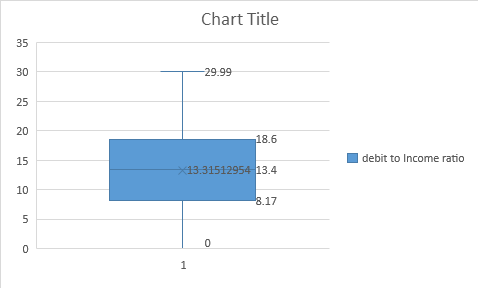

Above median value 13.4 dti value may be DEFAULTERS

•	loan_status Vs annual_inc through EXCEL


loan_status	  Average of annual_inc

Charged Off	  62427.29803
Current	      75430.66511
Fully Paid	  69862.50333
Grand Total	  68968.92638

If the annual income is less for the borrower then he is likely to become a DEFAULTER

loan_status	  Average of total_pymnt

Charged Off	  6838.030941
Current	      21852.87556
Fully Paid	  12725.78196
Grand Total	  12153.59654

If the total_pymnt is less for the borrower then he is likely to become a DEFAULTER

##### Bivariate Analysis on Continuous Variables

import pandas as pd
data=pd.read_csv(r'F:\UPGRAD\loan\loan\loan.csv')
curr2=pd.DataFrame(data, columns= ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'installment', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp'])
curr2
curr2.corr()

import matplotlib.pyplot as plt
plt.matshow(curr2.corr())
plt.show()
![plot1.png](attachment:plot1.png)


INFERENCE
'loan_amnt' is correlated to  'funded_amnt', 
'loan_amnt' and to  'funded_amnt‘ is correlated ''installment', 
'total_pymnt', 
'funded_amnt_inv' is correlated to 'total_pymnt_inv',
total_pymnt and total_pymnt_inv' is correlated to 'total_rec_prncp


# this my rough work....

In [ ]:
import pandas as pd
data=pd.read_csv(r'F:\UPGRAD\loan\loan\loan.csv')
share=pd.DataFrame(data, columns= ['dti'])
share['dti']


In [ ]:
import pandas as pd
data=pd.read_csv(r'F:\UPGRAD\loan\loan\loan.csv')
dti=pd.DataFrame(data, columns= ['dti'])
dti['dti']
print(dti.mean())
print(dti.describe())

In [ ]:
Q1 = dti['dti'].quantile(0.95)
Q3 = dti['dti'].quantile(1)
IQR = Q3 - Q1

df = dti[~((dti['dti'] < (Q3 - Q1)) |(dti['dti'] > (Q3 + 1.5 * IQR)))]

In [ ]:
print(df)
df.mean()

In [ ]:
import numpy

arr = dti['dti']

elements = numpy.array(arr)

mean = numpy.mean(elements, axis=0)
sd = numpy.std(elements, axis=0)

final_list = [x for x in arr if (x > mean - 2 * sd)]
final_list = [x for x in final_list if (x < mean + 2 * sd)]
mn=numpy.mean(final_list, axis=0)
print(mn)
print(final_list)

In [ ]:
import pandas as pd
cenus=pd.read_csv(r'F:\UPGRAD\loan\loan\loan.csv')
cenus.describe()

In [ ]:
import pandas as pd
data=pd.read_csv(r'F:\UPGRAD\loan\loan\loan.csv')
curr=pd.DataFrame(data, columns= ['loan_amnt','annual_inc','total_rec_prncp'])
curr


In [ ]:
curr.corr()

In [ ]:
import matplotlib.pyplot as plt
plt.matshow(curr.corr())
plt.show()

In [ ]:
import pandas as pd
cust_rating = pd.read_csv('https://media-doselect.s3.amazonaws.com/generic/GvOkzy5MLdy9zJ8vXMArwpRvN/rating_final.csv')
cust_rating=pd.DataFrame(cust_rating, columns= ['userID','placeID','rating','food_rating','service_rating','avg_rating'])
cust_rating['avg_rating'] = round(cust_rating[['rating','food_rating','service_rating']].mean(axis=1))

print(cust_rating.head(10))

In [ ]:
import pandas as pd
data=pd.read_csv(r'F:\UPGRAD\loan\loan\loan.csv')
curr1=pd.DataFrame(data, columns= ['int_rate','dti'])
curr1

In [ ]:
curr1.corr()

In [ ]:
import matplotlib.pyplot as plt
plt.matshow(curr1.corr())
plt.show()

In [ ]:
import pandas as pd
data=pd.read_csv(r'F:\UPGRAD\loan\loan\loan.csv')
curr2=pd.DataFrame(data, columns= ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'installment', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp'])
curr2


In [ ]:
curr2.corr()

In [ ]:
import matplotlib.pyplot as plt
plt.matshow(curr2.corr())
plt.show()